<a href="https://colab.research.google.com/github/EthicalFlipper/MachineLearning/blob/main/TestModelOnText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4000)              60004000  
                                                                 
 dropout_8 (Dropout)         (None, 4000)              0         
                                                                 
 dense_11 (Dense)            (None, 2000)              8002000   
                                                                 
 dropout_9 (Dropout)         (None, 2000)              0         
                                                                 
 dense_12 (Dense)            (None, 500)               1000500   
                                                                 
 dropout_10 (Dropout)        (None, 500)               0         
                                                                 
 dense_13 (Dense)            (None, 250)              

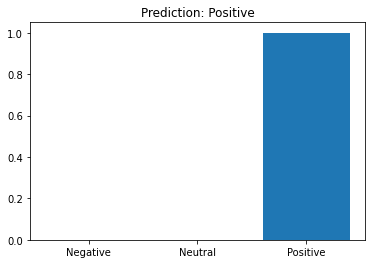

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import joblib
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


model = tf.keras.models.load_model('sentiments.h5') #Load my model
vocab = joblib.load("vocab.pkl") #Load the vocabulary
model.summary() #Make sure its right model

vect = CountVectorizer() #New CountVectorizer object, CountVectorizer is needed to make text readable for neural network
vect.vocabulary = vocab #Set the vocabulary of this vectorizer to the vocabulary loaded from drive
def vectorize(text, vectorizer):
  text = vect.fit_transform(text)
  text = text.toarray() #Convert text to array
  return text #Return the text

review = ["I like these Heeleys so much I think they are extremely cool and they do a great job getting me places"] #Variable which is equal to a test review
x = vectorize(review, vect) #Vectorize the review
pred_array = model.predict(x) #Use the model to create an array of predictions
print(pred_array)

def graph_results(prediction_array, index):
  labels = ["Negative", "Neutral", "Positive"] #A list to hold the labels for each output category
  predicted = np.argmax(prediction_array[index]) #Set predicted label to a variable called predicted
  title = "Prediction: " + labels[predicted] #Create the graph inside the function by getting the title of the graph to the predicted outcome
  graph = plt.subplot()
  graph.bar(range(3), prediction_array[index]) #Set the graph type to a bar graph, use a range from 0 to 3 for the x-values, and use the prediction_array as the y-values
  graph.set_xticks(range(3)) #Add labels to x-axis
  graph.set_xticklabels(labels) #Add labels to x-axis
  graph.set_title(title) #Add title to the graph
  plt.show() #Show the graph

graph_results(pred_array, 0)

['I liked this shirt a lot it is very green and very cool and all my friends recognize me as a jedi', 'This shirt is terrible i hate it a lot and its awful', 'this shirt is so good i love to wear it and to see it in action its great and not terrible at all', 'this shirt is good. its green and black and its very comfortable', "i think this shirt is okay but the sizing isnt great for robots. I don't like that it isnt size inclusive but i like the shirt"]
I liked this shirt a lot it is very green and very cool and all my friends recognize me as a jedi


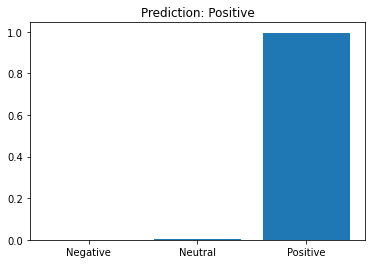

This shirt is terrible i hate it a lot and its awful


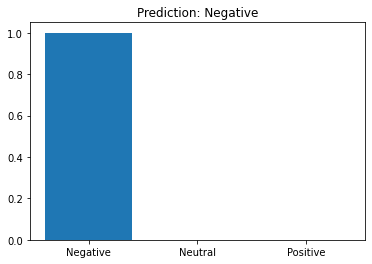

this shirt is so good i love to wear it and to see it in action its great and not terrible at all


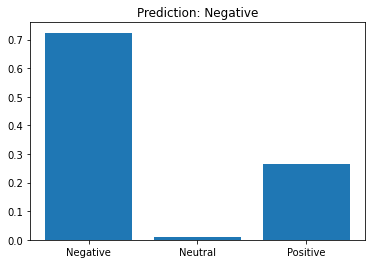

this shirt is good. its green and black and its very comfortable


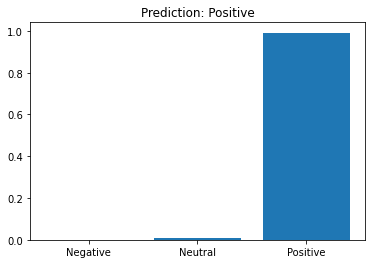

i think this shirt is okay but the sizing isnt great for robots. I don't like that it isnt size inclusive but i like the shirt


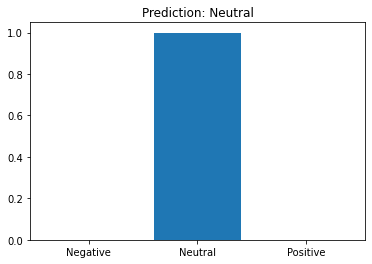

In [ ]:
import requests
from bs4 import BeautifulSoup
URL = 'https://charlotteec.github.io/'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
reviews = soup.find_all(id = "content") #Find all the reviews on the page
#Clean up the reviews for best outcome
clean_reviews = []
for review in reviews:
  text = review.get_text().strip()
  clean_reviews.append(text) #Add the cleaned reviews to clean_reviews
print(clean_reviews)
x = vectorize(clean_reviews, vect) #New list of vectorized reviews
pred_array = model.predict(x) #Predictions array using the model

for i in range(len(clean_reviews)): #Will run the same amount of times as there are reviews
  print(clean_reviews[i])
  graph_results(pred_array, i)
